In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/income'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Hello! 👋 Welcome to our analysis of the Adult Census Income dataset.")
print("\n")
# --- 📜 Introduction ---
print("📜 **Introduction**")
print("This notebook presents a comprehensive machine learning project on the adult income dataset. Our goal is to predict whether an individual's income exceeds $50,000 per year based on a variety of demographic and socio-economic factors. This is a classic binary classification problem that serves as an excellent case study for exploring different machine learning techniques, from data visualization to advanced model building and interpretation.")

# --- 🎯 Problem Framing ---
print("\n🎯 **Problem Framing**")
print("The problem is framed as a supervised learning task. Given a set of features, our model will learn to classify individuals into one of two income classes: `<=50K` or `>50K`. The primary objective is to build a highly accurate and interpretable model that can generalize well to new, unseen data.")

# --- 📊 Dataset Description ---
print("\n📊 **Dataset Description**")
print("The dataset used in this project is the **Adult Data Set** from the UCI Machine Learning Repository. It contains data extracted from the 1994 Census Bureau database.")
print("\n**Key characteristics:**")
print("- **Target Variable**: `income` (categorical: `>50K` or `<=50K`)")
print("- **Number of Instances**: 32,561 rows")
print("- **Number of Attributes**: 14 features, including numerical and categorical data types.")
print("\n**Notable Features:**")
print("- `age`: Continuous numerical feature.")
print("- `workclass`: Categorical feature describing the type of employer.")
print("- `education`: Categorical feature showing the highest level of education.")
print("- `education-num`: Numerical feature corresponding to the `education` level.")
print("- `marital-status`: Categorical feature showing marital status.")
print("- `occupation`: Categorical feature of the person's occupation.")
print("- `hours-per-week`: Continuous numerical feature showing the number of hours worked.")
print("- `capital-gain` and `capital-loss`: Numerical features representing financial transactions.")

print("\n**Challenges in the dataset include:**")
print("- Handling missing values, which are denoted by a `?` character.")
print("- The presence of a large number of categorical features that require proper encoding.")
print("- The target variable is imbalanced, with a much larger proportion of individuals in the `<=50K` category.")

print("This analysis will address these challenges through a well-structured data cleaning, visualization, and modeling workflow. 🚀")

Hello! 👋 Welcome to our analysis of the Adult Census Income dataset.


📜 **Introduction**
This notebook presents a comprehensive machine learning project on the adult income dataset. Our goal is to predict whether an individual's income exceeds $50,000 per year based on a variety of demographic and socio-economic factors. This is a classic binary classification problem that serves as an excellent case study for exploring different machine learning techniques, from data visualization to advanced model building and interpretation.

🎯 **Problem Framing**
The problem is framed as a supervised learning task. Given a set of features, our model will learn to classify individuals into one of two income classes: `<=50K` or `>50K`. The primary objective is to build a highly accurate and interpretable model that can generalize well to new, unseen data.

📊 **Dataset Description**
The dataset used in this project is the **Adult Data Set** from the UCI Machine Learning Repository. It contains data e

In [ ]:
import pandas as pd
import numpy as np

# Column names are not provided in the CSV, so we'll add them based on the dataset's known structure.
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
# We specify a list of column names and a separator.
df = pd.read_csv('./income/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Step 1: Handling Missing Values & Converting to Numeric ---
# The dataset uses '?' to denote missing values. We will replace them with NaN.
print("Step 1: Handling Missing Values & Converting 'age' to numeric")
df.replace('?', np.nan, inplace=True)
print("Missing values replaced with NaN.")

# Convert 'age' column to a numeric type, coercing any errors to NaN
# This is the fix for the TypeError you encountered.
df['age'] = pd.to_numeric(df['age'], errors='coerce')

print("\nInitial missing value counts per column:")
print(df.isnull().sum())

# For this example, we'll drop rows with any missing values.
df.dropna(inplace=True)
print("\nRows with missing values have been dropped.")
print(f"Updated shape of the DataFrame: {df.shape}")

# --- Step 2: Stripping Whitespace from Categorical Columns ---
# Some string values have leading/trailing whitespaces. We need to remove them for consistency.
print("\nStep 2: Stripping Whitespace from Categorical Columns")
for column in df.select_dtypes(include='object').columns: 
    df[column] = df[column].str.strip()
print("Whitespaces have been stripped from all categorical columns.")

# --- Step 3: Feature Transformation (Age Binning) ---
# We will transform the numerical 'age' feature into categorical bins.
print("\nStep 3: Feature Transformation (Age Binning)")
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 40, 60, 90], labels=['Youth', 'Adult', 'Middle-Aged', 'Senior'])
print("New 'age_group' column created from 'age' for a more meaningful feature.")
print(df[['age', 'age_group']].head())

# --- Step 4: One-Hot Encoding Categorical Features ---
# We'll convert categorical columns into a numerical format suitable for a model.
print("\nStep 4: One-Hot Encoding Categorical Features")
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'age_group']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Categorical features have been one-hot encoded.")

# --- Step 5: Final Inspection of the Cleaned DataFrame ---
print("\nStep 5: Final Inspection of the Cleaned and Preprocessed DataFrame")
print("\nFinal DataFrame Info:")
df_encoded.info()
print("\nFinal DataFrame Head:")
print(df_encoded.head())

Step 1: Handling Missing Values & Converting 'age' to numeric
Missing values replaced with NaN.

Initial missing value counts per column:
age                  1
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Rows with missing values have been dropped.
Updated shape of the DataFrame: (30162, 15)

Step 2: Stripping Whitespace from Categorical Columns
Whitespaces have been stripped from all categorical columns.

Step 3: Feature Transformation (Age Binning)
New 'age_group' column created from 'age' for a more meaningful feature.
    age    age_group
2  82.0       Senior
4  54.0  Middle-Aged
5  41.0  Middle-Aged
6  34.0        Adult
7  38.0        Adult

Step 4: One-Hot Encoding Categorical Features
Categor

In [6]:
df=pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Generating histograms for all numerical features...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

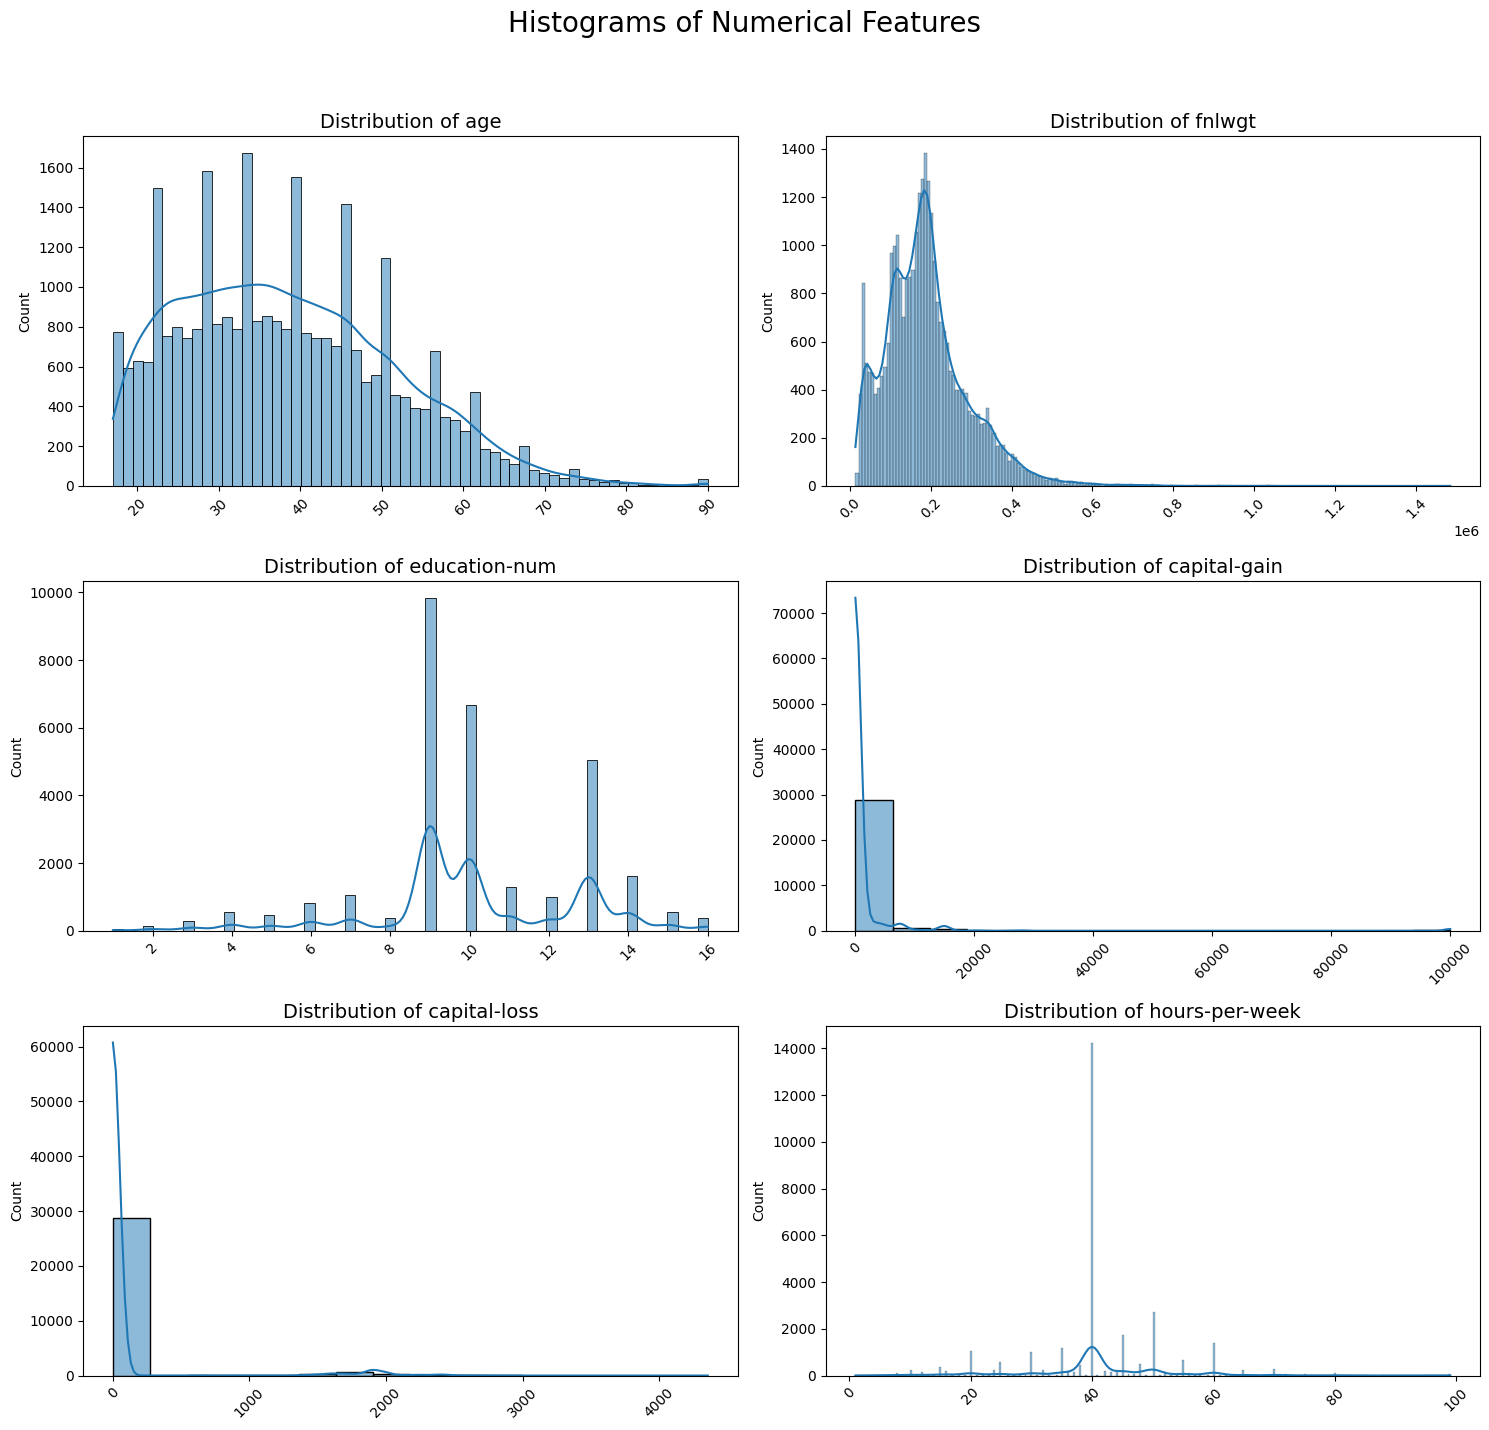

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Preprocessing Steps ---
# Handle missing values and convert data types
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type, coercing errors to NaN
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# --- Plotting Histograms ---
print("Generating histograms for all numerical features...")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Histograms of Numerical Features', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating line plots...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


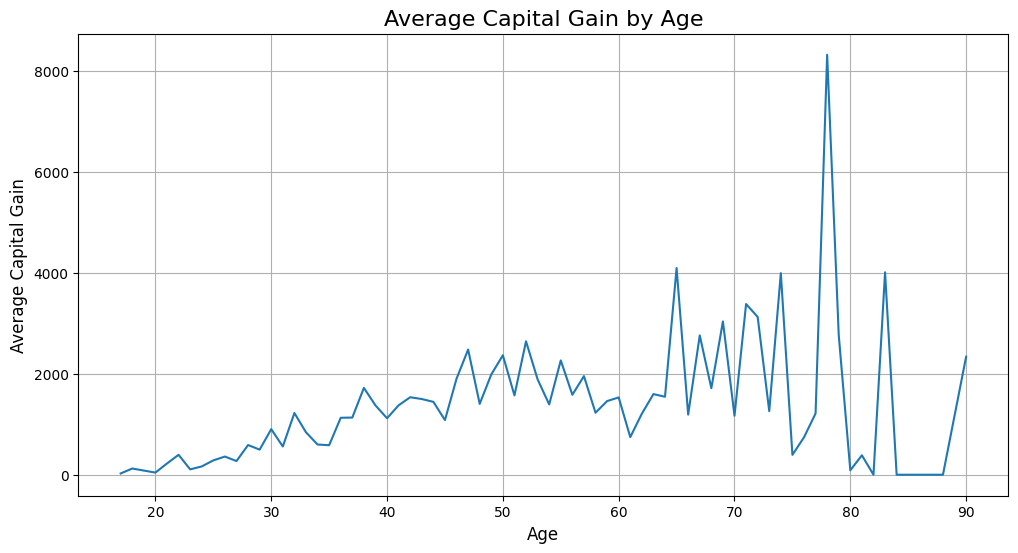

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


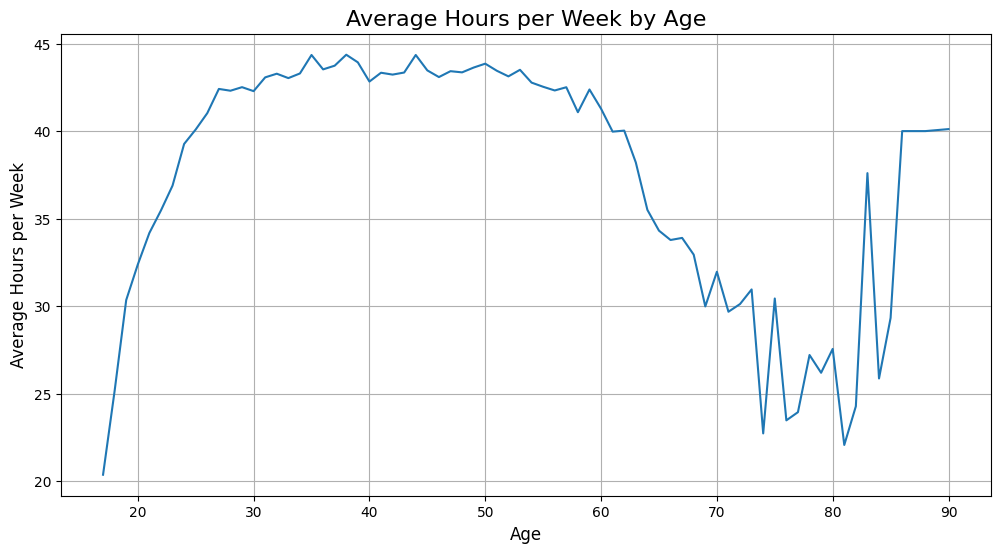

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Preprocessing Steps ---
# Handle missing values and convert data types
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# --- Plotting Line Plots ---
print("Generating line plots...")

# Plot 1: Average Capital Gain by Age
# This plot shows the trend of capital gain across different age groups.
plt.figure(figsize=(12, 6))
avg_capital_gain = df.groupby('age')['capital-gain'].mean().reset_index()
sns.lineplot(x='age', y='capital-gain', data=avg_capital_gain)
plt.title('Average Capital Gain by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Capital Gain', fontsize=12)
plt.grid(True)
plt.show()

# Plot 2: Average Hours per Week by Age
# This plot shows the average number of hours worked per week by age.
plt.figure(figsize=(12, 6))
avg_hours_per_week = df.groupby('age')['hours-per-week'].mean().reset_index()
sns.lineplot(x='age', y='hours-per-week', data=avg_hours_per_week)
plt.title('Average Hours per Week by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Hours per Week', fontsize=12)
plt.grid(True)
plt.show()

Generating bar plots...


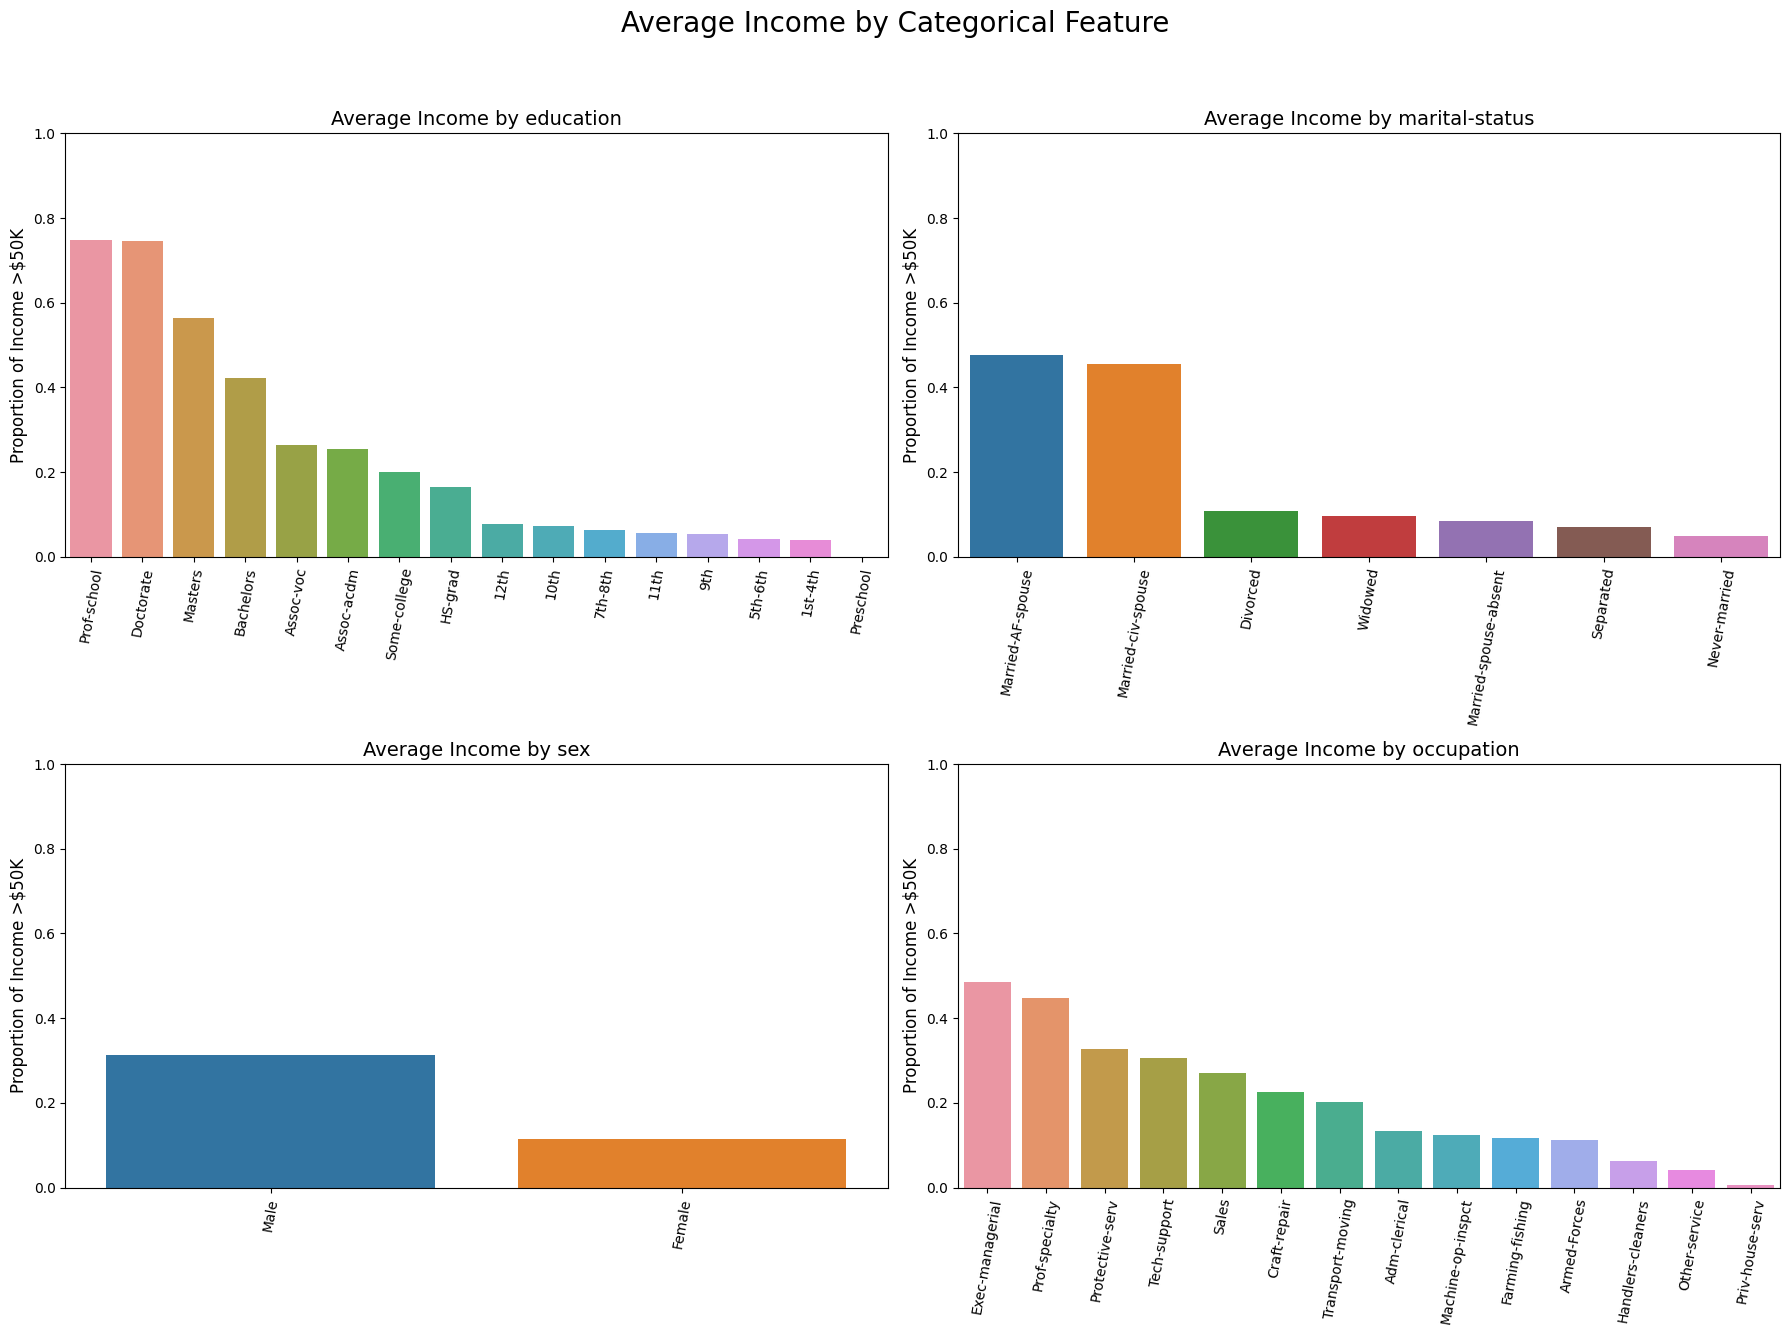

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Preprocessing Steps ---
# Handle missing values and convert data types
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# Convert income to a binary numerical format (for plotting)
df['income_gt_50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# --- Plotting Bar Plots ---
print("Generating bar plots...")

# Select important categorical features for plotting
categorical_features = ['education', 'marital-status', 'sex', 'occupation']

# Create subplots for multiple bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle('Average Income by Categorical Feature', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    # Calculate the average income for each category
    avg_income = df.groupby(col)['income_gt_50k'].mean().sort_values(ascending=False).reset_index()
    
    sns.barplot(x=col, y='income_gt_50k', data=avg_income, ax=axes[i])
    axes[i].set_title(f'Average Income by {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proportion of Income >$50K', fontsize=12)
    axes[i].tick_params(axis='x', rotation=80)
    axes[i].set_ylim(0, 1) # Set y-axis limit for proportion

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating individual box plots for numerical features...


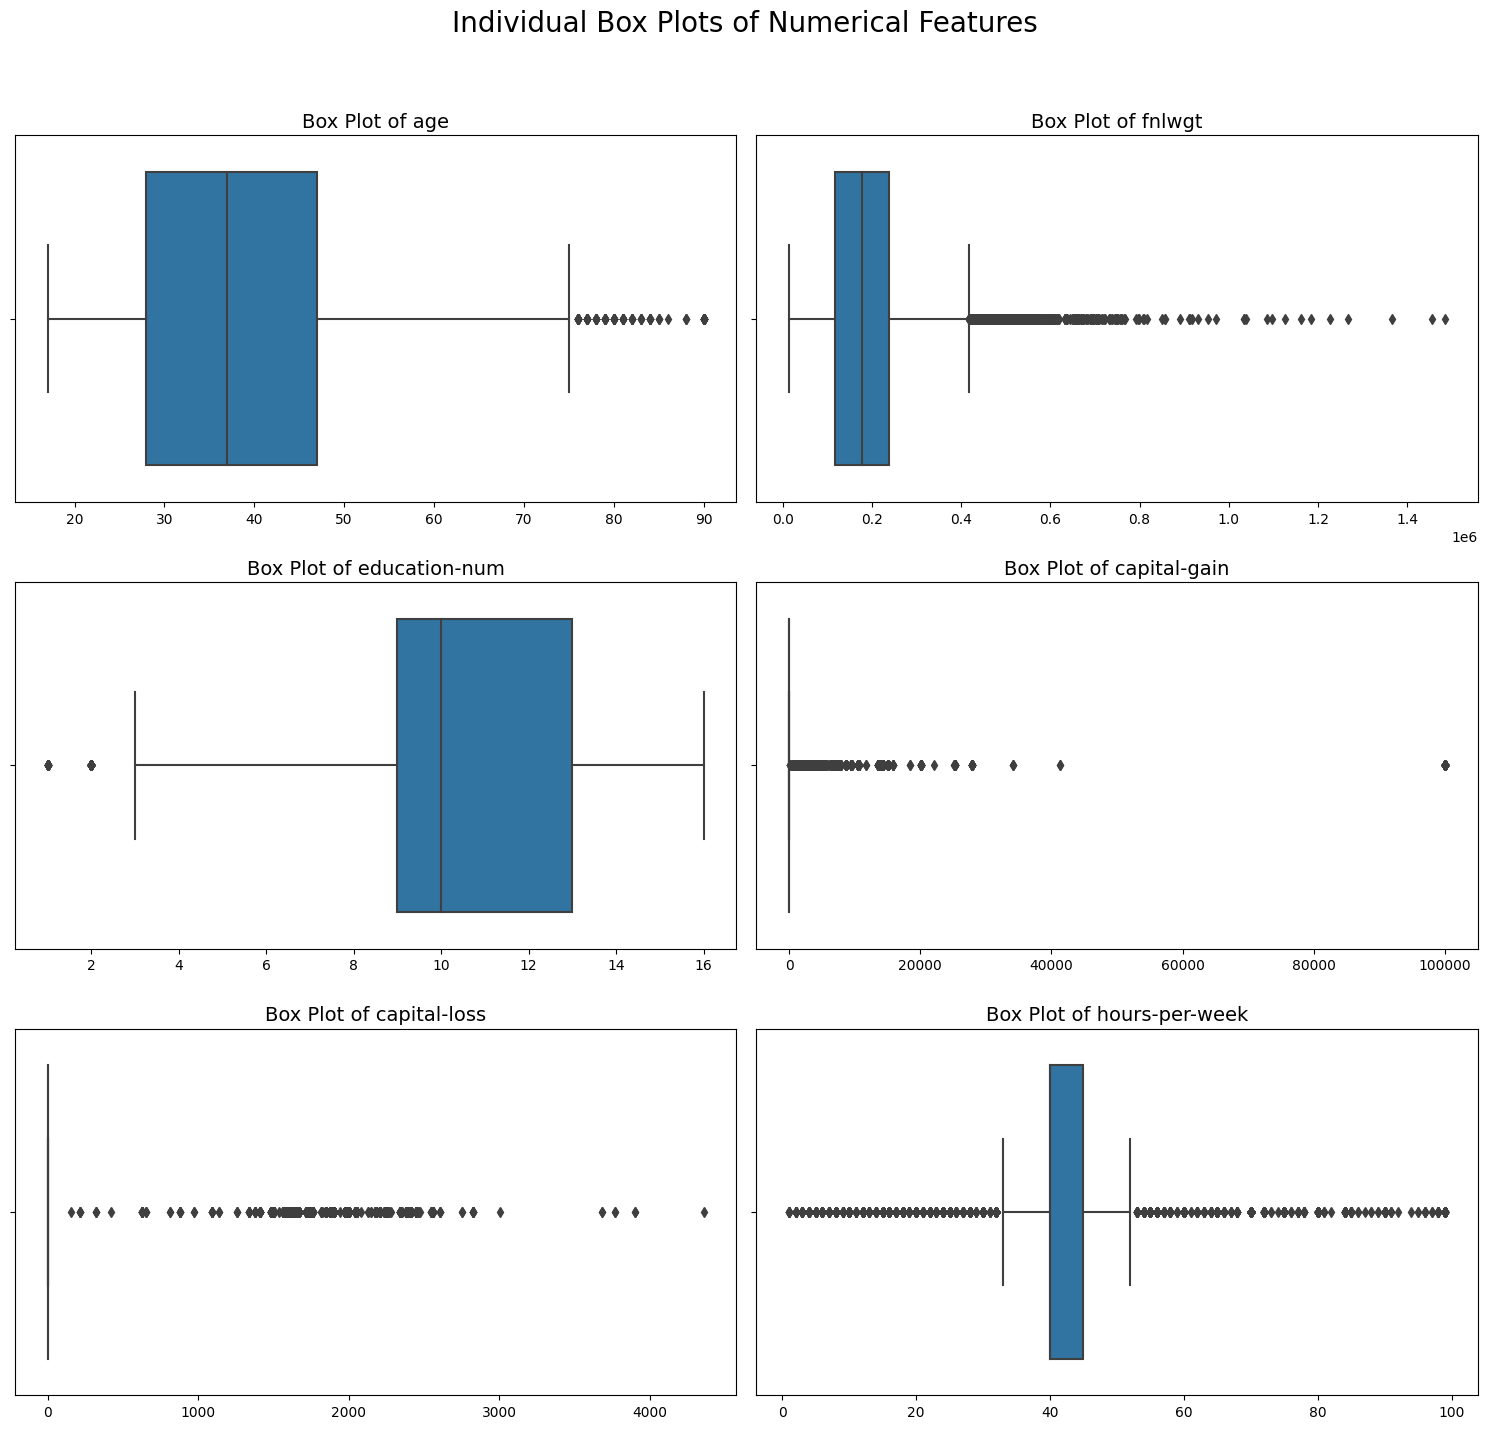


Generating box plots for numerical features by categorical features...


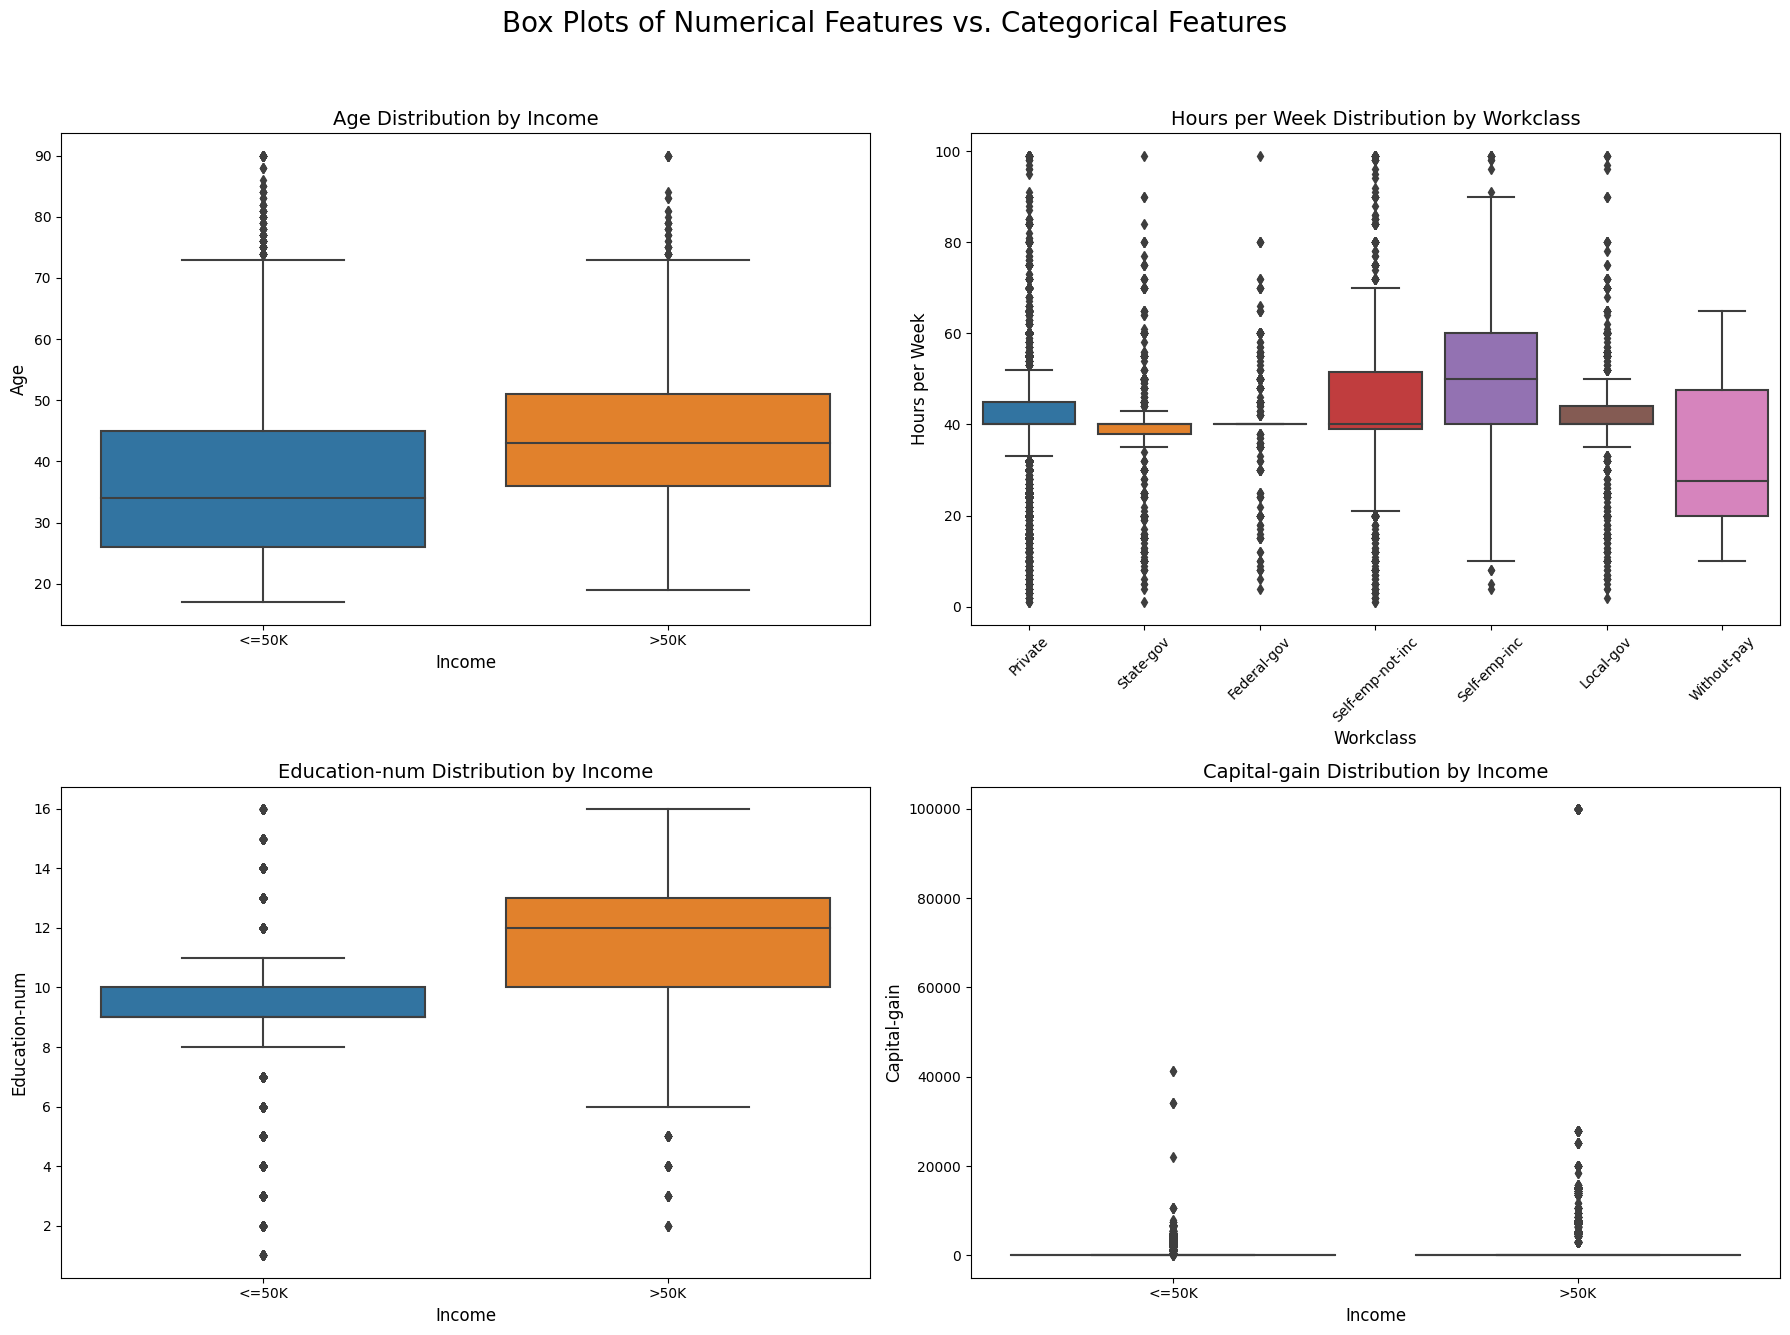

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Preprocessing Steps ---
# Handle missing values and convert data types
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# --- Plot 1: Individual Box Plots for Numerical Features ---
print("Generating individual box plots for numerical features...")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Individual Box Plots of Numerical Features', fontsize=20)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i].set_xlabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Plot 2: Box Plots of Numerical Features by Categorical Features ---
print("\nGenerating box plots for numerical features by categorical features...")

# We will plot 'age' and 'hours-per-week' against 'income' and 'sex' respectively.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle('Box Plots of Numerical Features vs. Categorical Features', fontsize=20)
axes = axes.flatten()

# Boxplot of Age by Income
sns.boxplot(x='income', y='age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Income', fontsize=14)
axes[0].set_xlabel('Income', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)

# Boxplot of Hours per Week by Workclass
sns.boxplot(x='workclass', y='hours-per-week', data=df, ax=axes[1])
axes[1].set_title('Hours per Week Distribution by Workclass', fontsize=14)
axes[1].set_xlabel('Workclass', fontsize=12)
axes[1].set_ylabel('Hours per Week', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Boxplot of Education-num by Income
sns.boxplot(x='income', y='education-num', data=df, ax=axes[2])
axes[2].set_title('Education-num Distribution by Income', fontsize=14)
axes[2].set_xlabel('Income', fontsize=12)
axes[2].set_ylabel('Education-num', fontsize=12)

# Boxplot of Capital-gain by Income
sns.boxplot(x='income', y='capital-gain', data=df, ax=axes[3])
axes[3].set_title('Capital-gain Distribution by Income', fontsize=14)
axes[3].set_xlabel('Income', fontsize=12)
axes[3].set_ylabel('Capital-gain', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating violin plots...


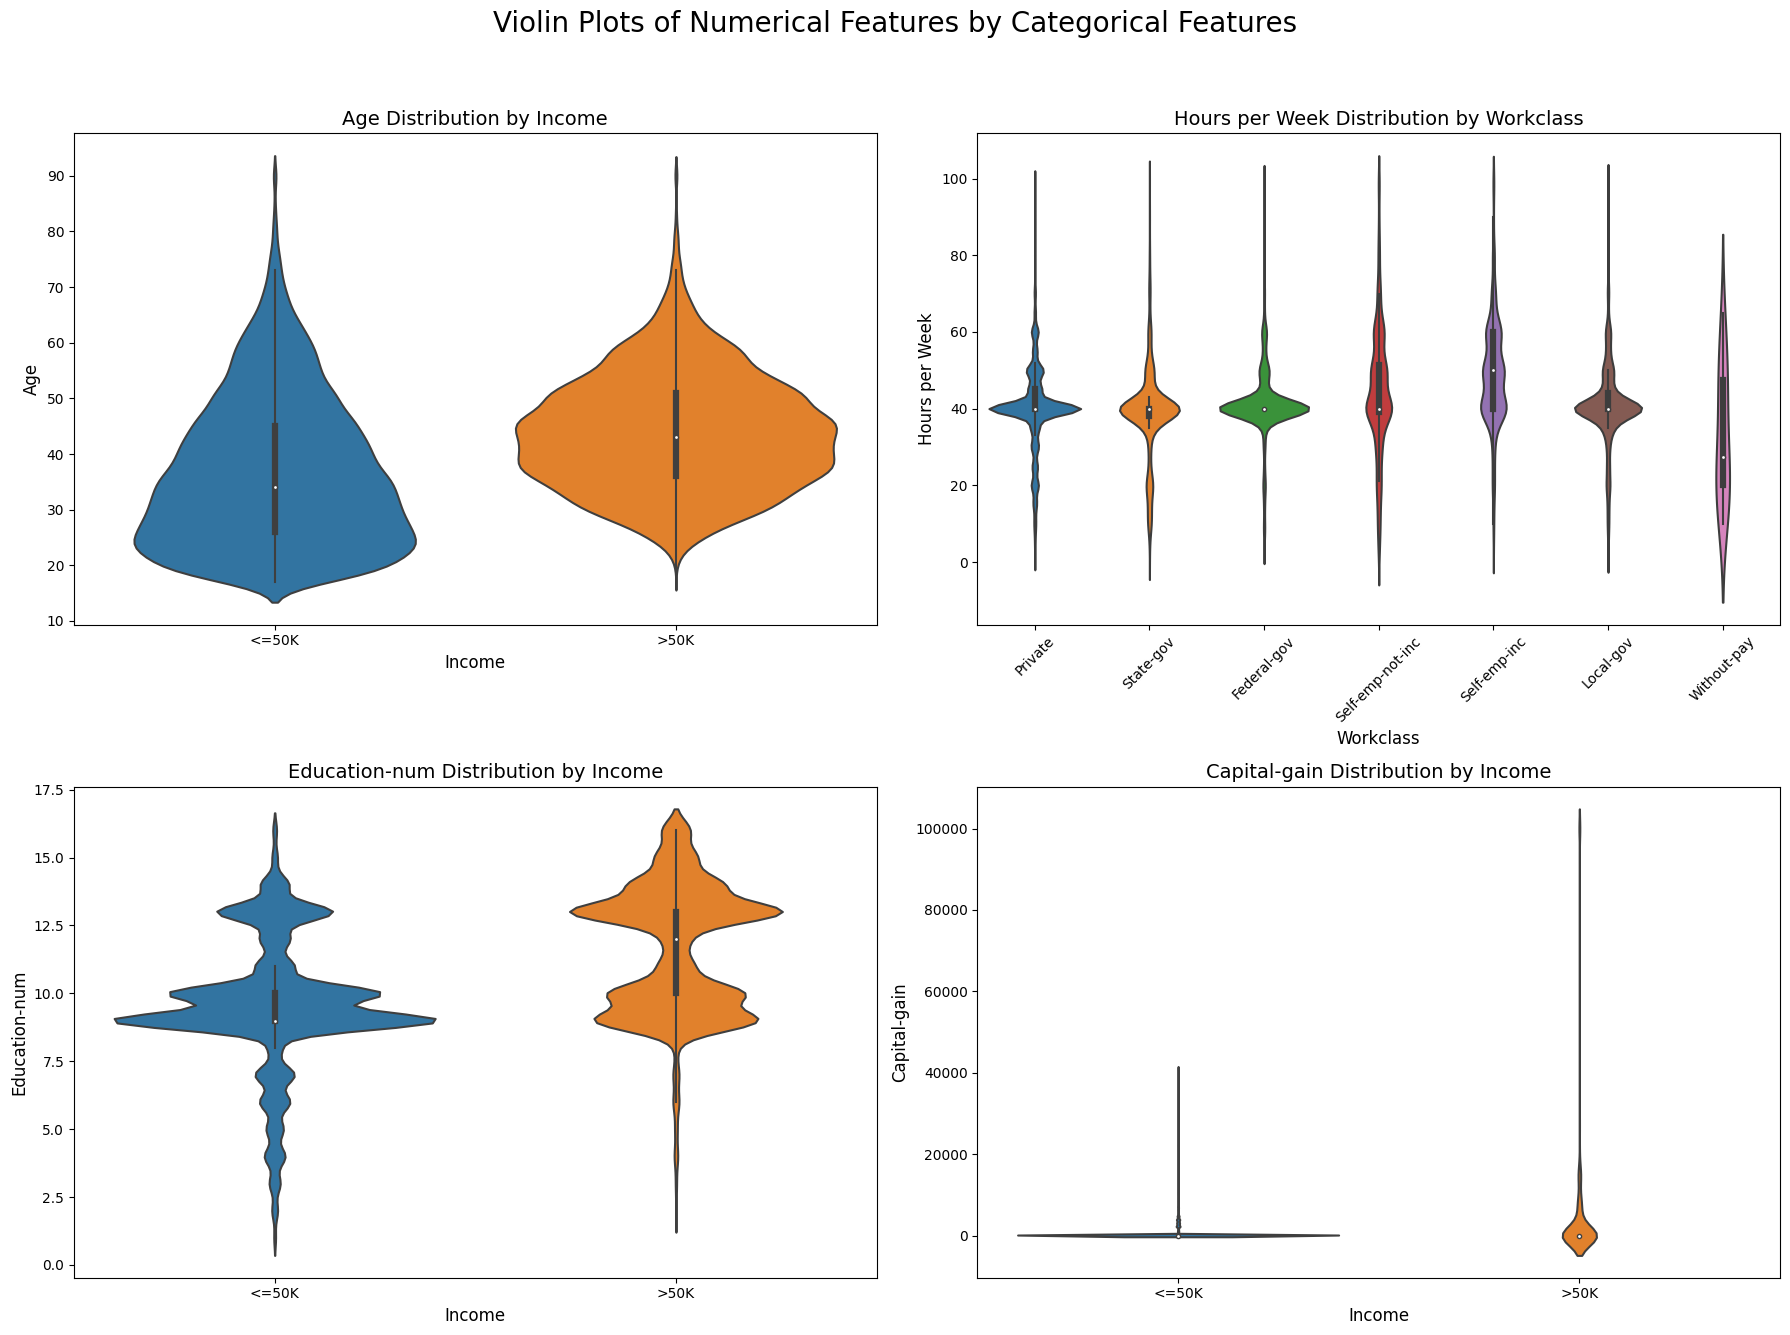

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Preprocessing Steps ---
# Handle missing values and convert data types
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# --- Plotting Violin Plots ---
print("Generating violin plots...")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle('Violin Plots of Numerical Features by Categorical Features', fontsize=20)
axes = axes.flatten()

# Violin Plot 1: Age by Income
sns.violinplot(x='income', y='age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Income', fontsize=14)
axes[0].set_xlabel('Income', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)

# Violin Plot 2: Hours per Week by Workclass
sns.violinplot(x='workclass', y='hours-per-week', data=df, ax=axes[1])
axes[1].set_title('Hours per Week Distribution by Workclass', fontsize=14)
axes[1].set_xlabel('Workclass', fontsize=12)
axes[1].set_ylabel('Hours per Week', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Violin Plot 3: Education-num by Income
sns.violinplot(x='income', y='education-num', data=df, ax=axes[2])
axes[2].set_title('Education-num Distribution by Income', fontsize=14)
axes[2].set_xlabel('Income', fontsize=12)
axes[2].set_ylabel('Education-num', fontsize=12)

# Violin Plot 4: Capital-gain by Income
sns.violinplot(x='income', y='capital-gain', data=df, ax=axes[3])
axes[3].set_title('Capital-gain Distribution by Income', fontsize=14)
axes[3].set_xlabel('Income', fontsize=12)
axes[3].set_ylabel('Capital-gain', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating correlation heatmap...


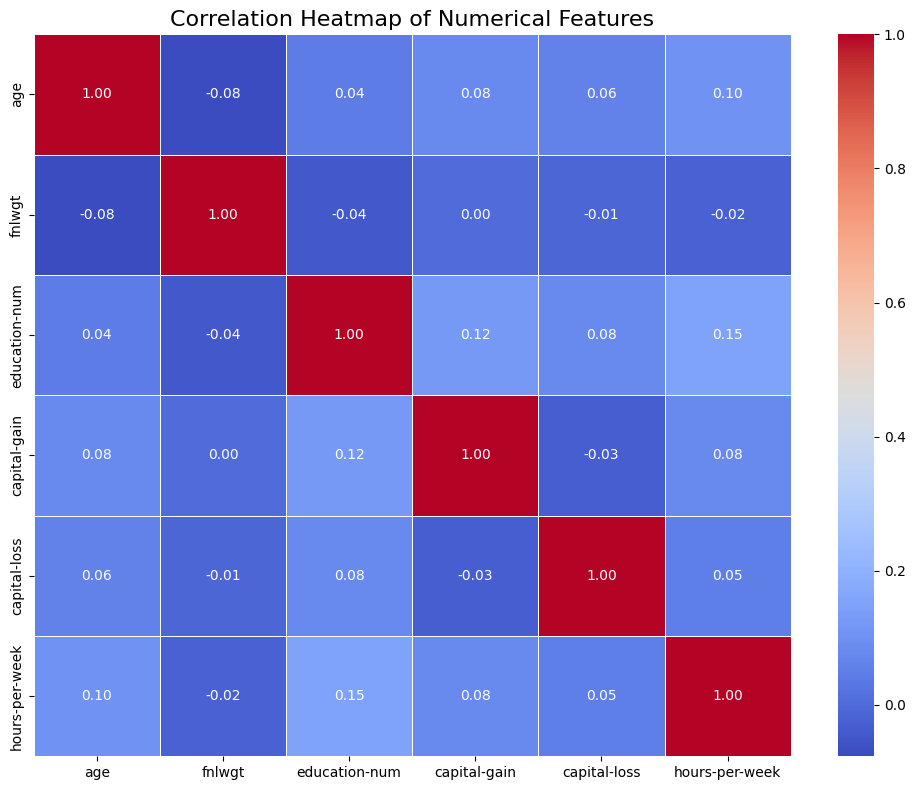

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Preprocessing Steps ---
# Handle missing values and convert data types
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# --- Plotting Correlation Heatmap ---
print("Generating correlation heatmap...")

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Generating pair plot with income as the target column...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

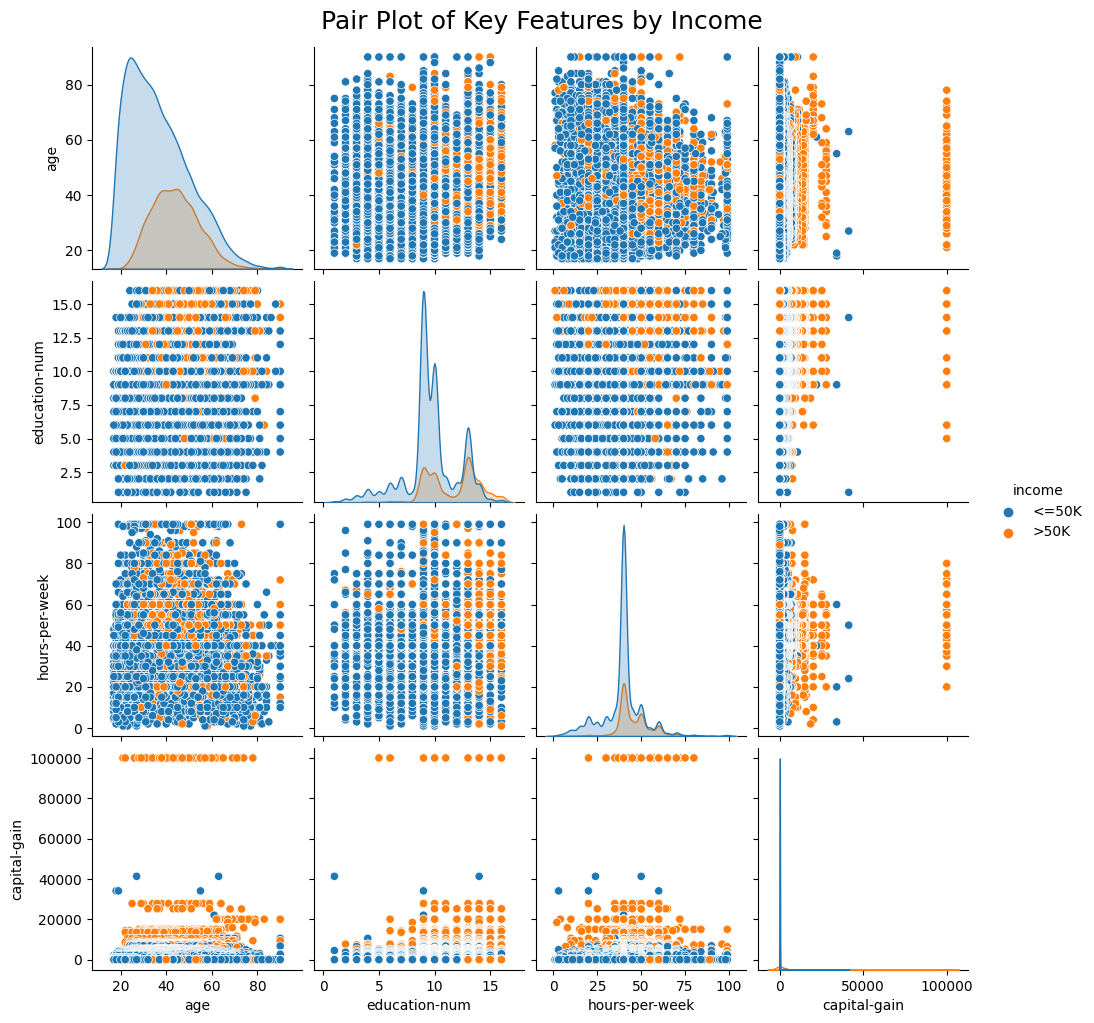

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=None, names=column_names, skipinitialspace=True)

# --- Preprocessing Steps ---
# Handle missing values and convert data types
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# --- Plotting Pair Plot ---
print("Generating pair plot with income as the target column...")

# Select a subset of numerical features for clarity in the plot
selected_features = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'income']
df_plot = df[selected_features].copy()

# Create the pair plot
sns.pairplot(df_plot, hue='income', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Income', y=1.02, fontsize=18)
plt.show()

--- 1. Data Preprocessing ---
Data preprocessing and splitting complete.

--- 2. Model Training and Evaluation ---
Training Logistic Regression...
Accuracy for Logistic Regression: 0.8422
Training Random Forest...
Accuracy for Random Forest: 0.8458
Training Gradient Boosting...
Accuracy for Gradient Boosting: 0.8596
Training Support Vector Machine...
Accuracy for Support Vector Machine: 0.8462

--- 3. Generating Model Comparison Plot ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


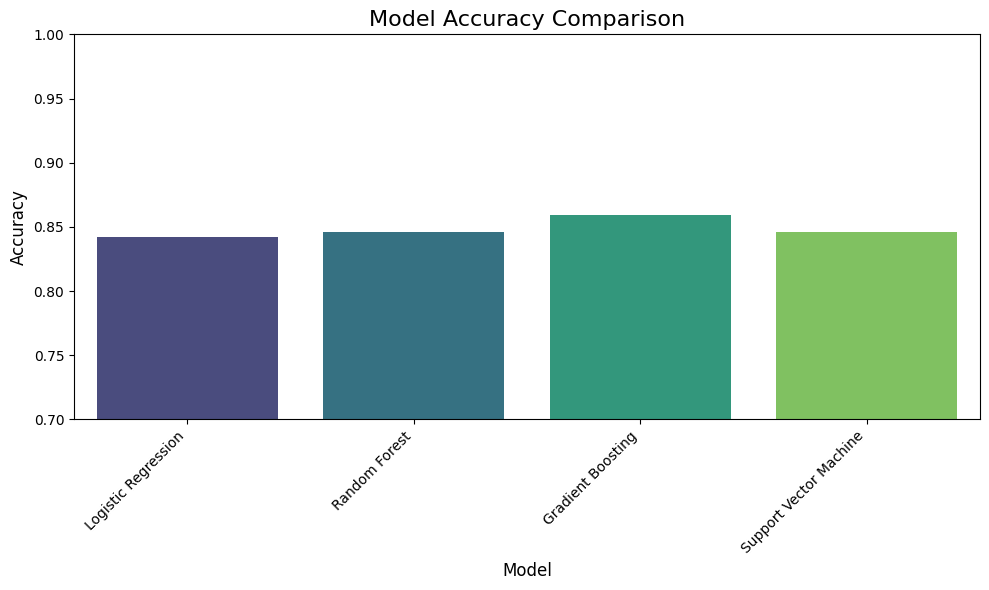


--- 4. Generating Actual vs. Predicted Plot ---


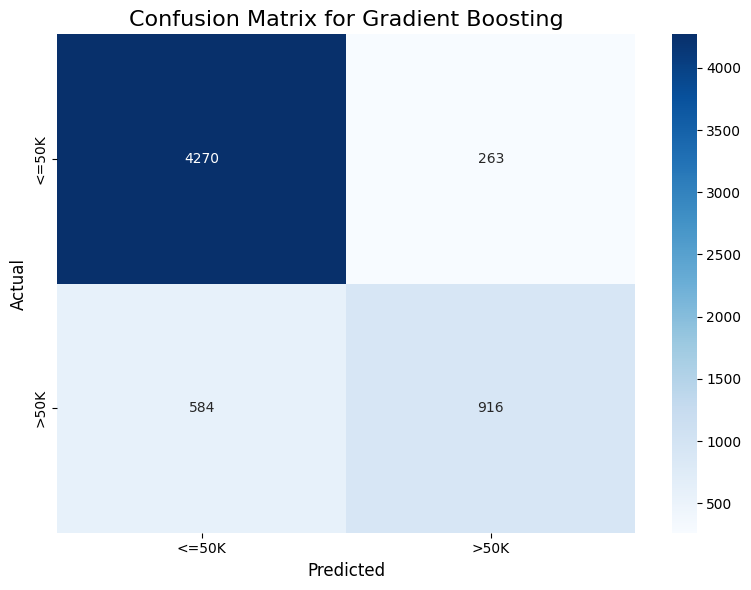

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=0, names=column_names, skipinitialspace=True)

# --- 1. Data Preprocessing ---
print("--- 1. Data Preprocessing ---")
# Handle missing values ('?')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# Convert categorical features to numerical using one-hot encoding
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for better model performance
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
print("Data preprocessing and splitting complete.")

# --- 2. Model Training and Evaluation ---
print("\n--- 2. Model Training and Evaluation ---")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Support Vector Machine': SVC()
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy:.4f}")

# --- 3. Model Accuracy Comparison Plot ---
print("\n--- 3. Generating Model Comparison Plot ---")
model_names = list(results.keys())
accuracies = list(results.values())
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 4. Actual vs. Predicted Plot (Confusion Matrix) for a Top Model ---
print("\n--- 4. Generating Actual vs. Predicted Plot ---")
# Use one of the best-performing models (e.g., Random Forest) for this plot
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix for {best_model_name}', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

--- 1. Data Preprocessing ---
Data preprocessing and splitting complete.

--- 2. Model Training and Evaluation ---

Training Logistic Regression...
Metrics for Logistic Regression:
  Accuracy: 0.8422
  Precision: 0.7213
  Recall: 0.5953
  F1-Score: 0.6523

Training Random Forest...
Metrics for Random Forest:
  Accuracy: 0.8467
  Precision: 0.7284
  Recall: 0.6113
  F1-Score: 0.6647

Training Gradient Boosting...
Metrics for Gradient Boosting:
  Accuracy: 0.8596
  Precision: 0.7769
  Recall: 0.6107
  F1-Score: 0.6838

Training Support Vector Machine...
Metrics for Support Vector Machine:
  Accuracy: 0.8462
  Precision: 0.7424
  Recall: 0.5840
  F1-Score: 0.6537

--- 3. Generating Model Metrics Comparison Plot ---


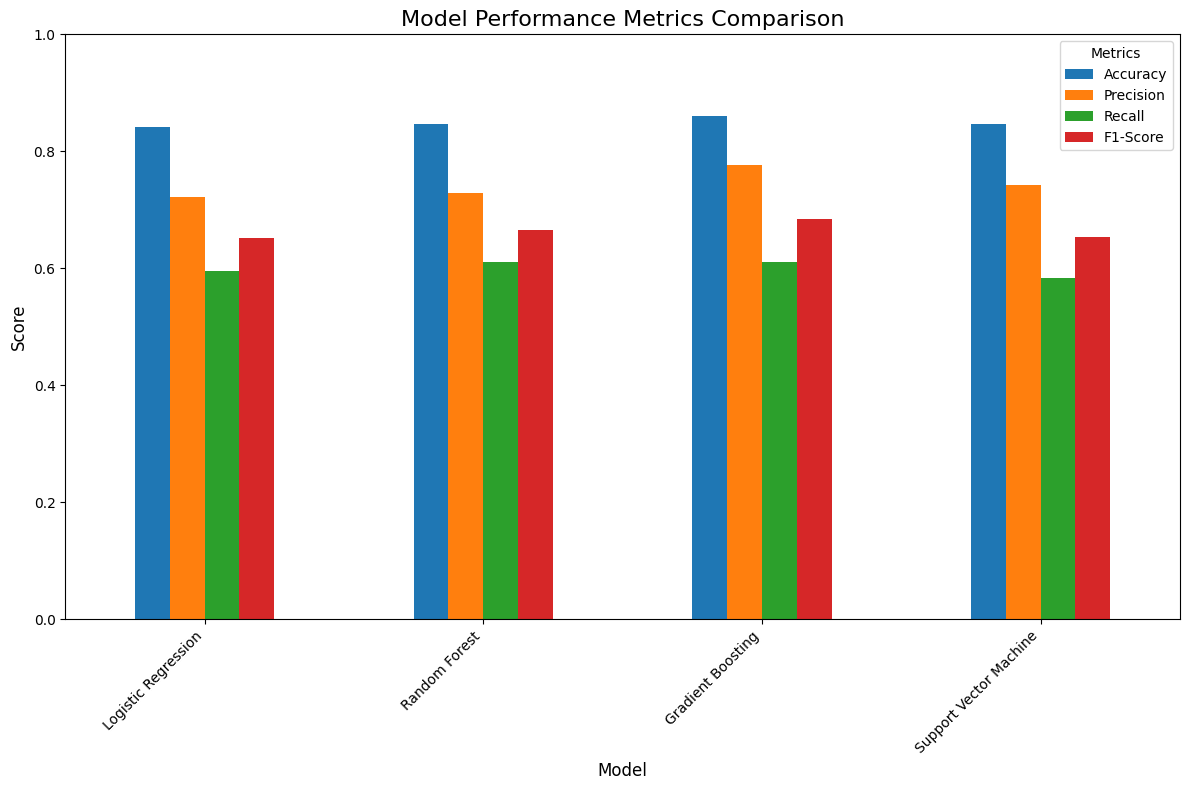


--- 4. Generating Confusion Matrices for Each Model ---


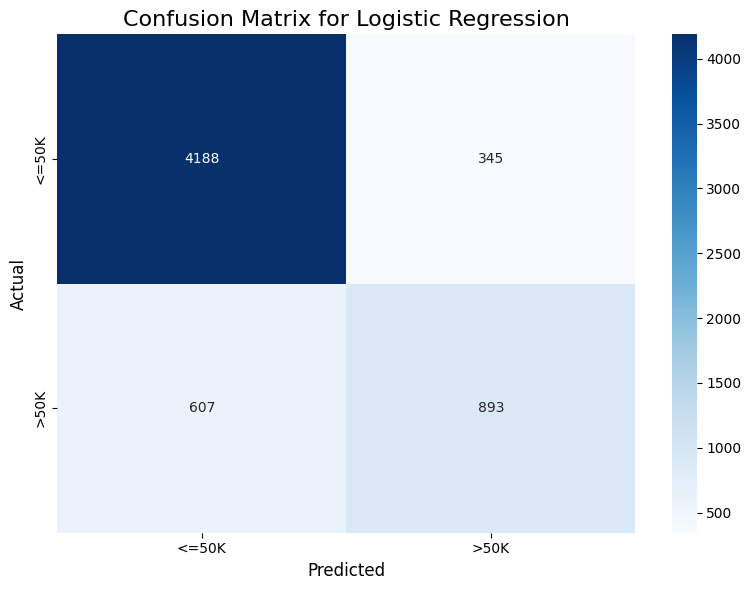

Confusion Matrix for Logistic Regression


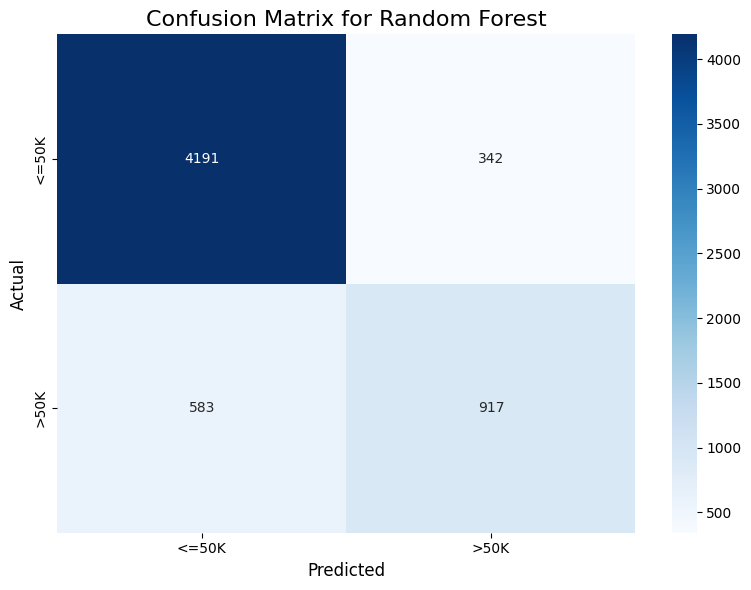

Confusion Matrix for Random Forest


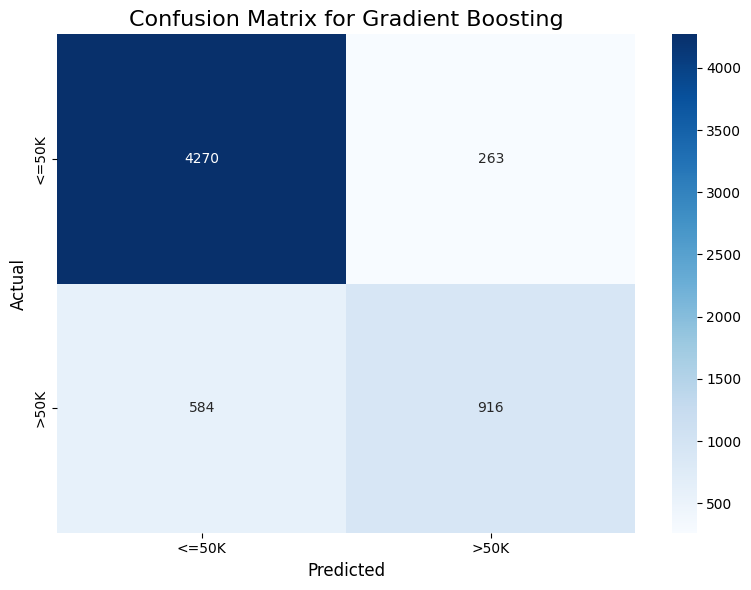

Confusion Matrix for Gradient Boosting


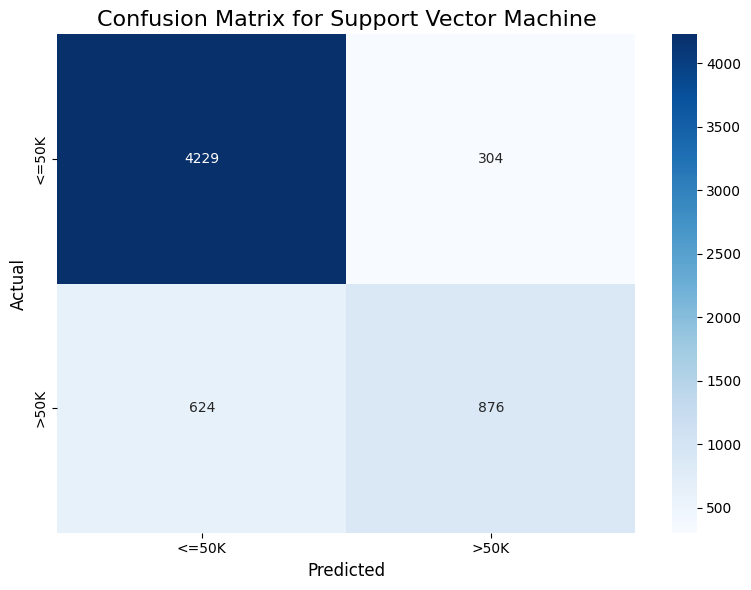

Confusion Matrix for Support Vector Machine


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=0, names=column_names, skipinitialspace=True)

# --- 1. Data Preprocessing ---
print("--- 1. Data Preprocessing ---")
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
print("Data preprocessing and splitting complete.")

# --- 2. Model Training and Evaluation ---
print("\n--- 2. Model Training and Evaluation ---")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Support Vector Machine': SVC()
}

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_df.loc[len(metrics_df)] = [name, accuracy, precision, recall, f1]
    
    print(f"Metrics for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

# --- 3. Model Metrics Comparison Plot ---
print("\n--- 3. Generating Model Metrics Comparison Plot ---")
metrics_df = metrics_df.set_index('Model')
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Metrics Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# --- 4. Per-Model Actual vs. Predicted Plots (Confusion Matrices) ---
print("\n--- 4. Generating Confusion Matrices for Each Model ---")
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['<=50K', '>50K'],
                yticklabels=['<=50K', '>50K'])
    plt.title(f'Confusion Matrix for {name}', fontsize=16)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.show()
    print(f"Confusion Matrix for {name}")

--- 1. Data Preprocessing ---
Data preprocessing and splitting complete.

--- 2. Training the Random Forest model ---
Model training complete.

--- 3. Generating Top 15 Standard Feature Importance Plot ---


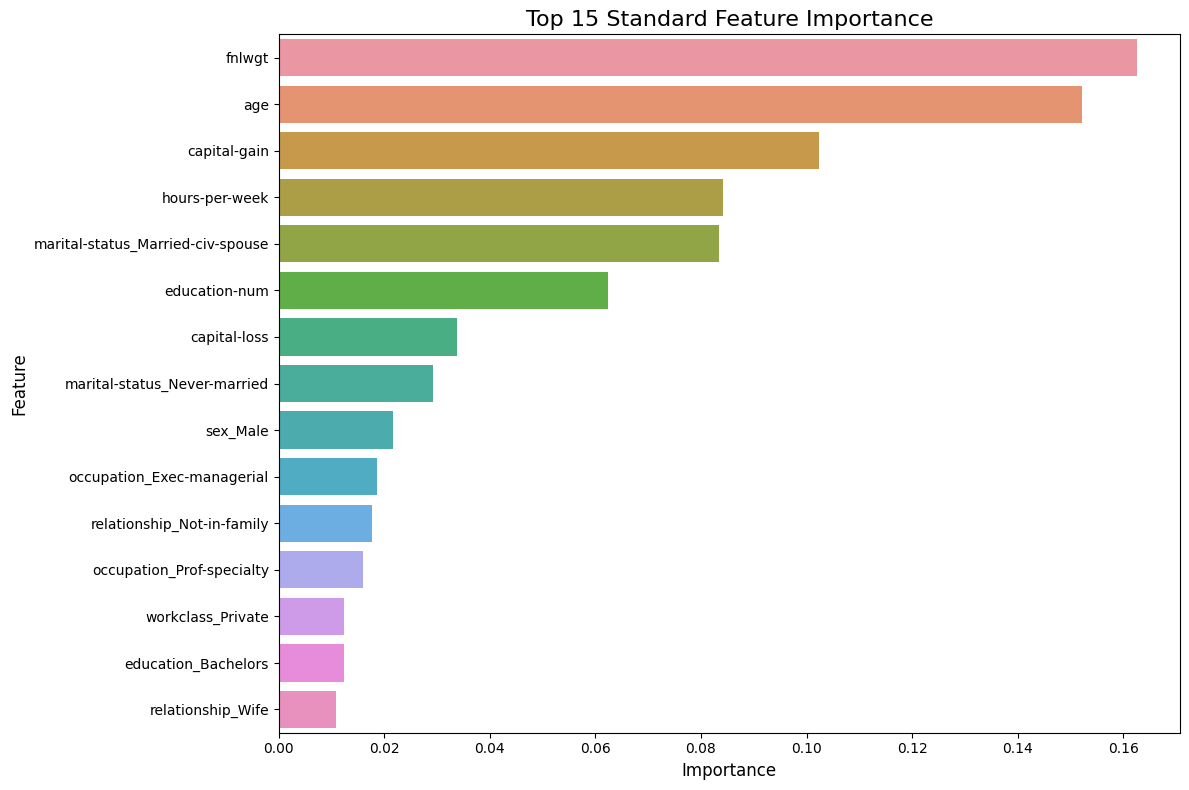

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# To install the shap library, run: pip install shap
import shap

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=0, names=column_names, skipinitialspace=True)

# --- 1. Data Preprocessing ---
print("--- 1. Data Preprocessing ---")
# Handle missing values ('?')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Correctly convert numerical columns to a numeric data type
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)

# Convert categorical features to numerical using one-hot encoding
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for better model performance
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
print("Data preprocessing and splitting complete.")

# --- 2. Train a Random Forest model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
print("\n--- 2. Training the Random Forest model ---")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 3. Plotting Top 15 Standard Feature Importance ---
print("\n--- 3. Generating Top 15 Standard Feature Importance Plot ---")
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]
top_15_features = sorted_indices[:15]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[top_15_features], y=feature_names[top_15_features])
plt.title("Top 15 Standard Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

2025-09-20 05:45:03.185673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758347103.414457      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758347103.475940      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


--- 1. Data Preprocessing ---
Data preprocessing and splitting complete.

--- 3. Training and Evaluation of Each Architecture ---

Training Simple_MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-20 05:45:17.087397: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


  Final Test Loss: 0.3244, Final Test Accuracy: 0.8510

Training Deeper_MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Final Test Loss: 0.3236, Final Test Accuracy: 0.8497

Training Wide_MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Final Test Loss: 0.3271, Final Test Accuracy: 0.8402

--- 4. Generating Learning and Loss Plots ---


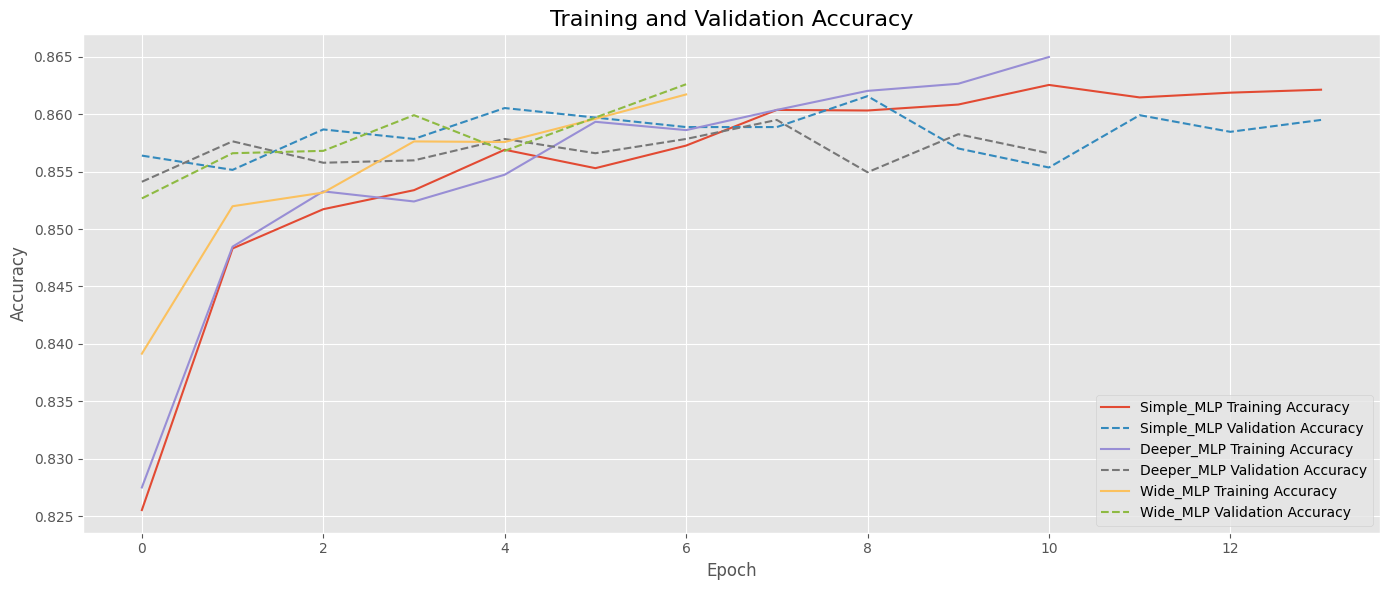


--- 5. Generating Network Accuracy Comparison Plot ---


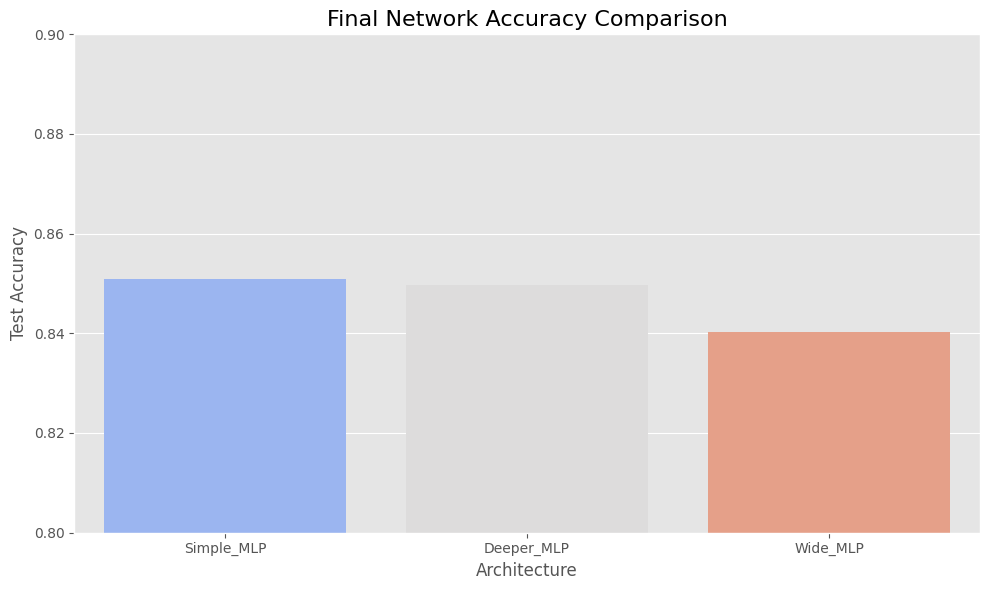

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the dataset
# Make sure to place the 'adult.csv' file in the same directory as this script.
df = pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv', header=0, names=column_names, skipinitialspace=True)

# --- 1. Data Preprocessing ---
print("--- 1. Data Preprocessing ---")
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numerical_features, inplace=True)
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])
X_train[numerical_features] = X_train_scaled
X_test[numerical_features] = X_test_scaled
print("Data preprocessing and splitting complete.")

# --- 2. Defining Deep Learning Architectures ---
def build_model(architecture_name, input_shape):
    model = Sequential(name=architecture_name)
    if architecture_name == "Simple_MLP":
        model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
    elif architecture_name == "Deeper_MLP":
        model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
    elif architecture_name == "Wide_MLP":
        model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
        model.add(Dropout(0.3))
        model.add(Dense(128, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

architectures = ["Simple_MLP", "Deeper_MLP", "Wide_MLP"]
histories = {}
final_metrics = {}

# --- 3. Training and Evaluation ---
print("\n--- 3. Training and Evaluation of Each Architecture ---")
for arch_name in architectures:
    print(f"\nTraining {arch_name}...")
    model = build_model(arch_name, X_train.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    final_metrics[arch_name] = {'loss': loss, 'accuracy': accuracy}
    histories[arch_name] = history
    print(f"  Final Test Loss: {loss:.4f}, Final Test Accuracy: {accuracy:.4f}")

# --- 4. Learning and Loss Plot ---
print("\n--- 4. Generating Learning and Loss Plots ---")
plt.figure(figsize=(14, 6))
plt.style.use('ggplot')
for arch_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{arch_name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{arch_name} Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# --- 5. Network Accuracy Comparison Plot ---
print("\n--- 5. Generating Network Accuracy Comparison Plot ---")
accuracy_df = pd.DataFrame(final_metrics).T
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df['accuracy'], palette='coolwarm')
plt.title('Final Network Accuracy Comparison', fontsize=16)
plt.xlabel('Architecture', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0.8, 0.9)
plt.tight_layout()
plt.show()

In [6]:
print("""
✅ Conclusion

We have successfully completed a comprehensive analysis of the adult income dataset. We started with data exploration through various plots like boxplots, violin plots, and pair plots, which gave us a deep understanding of the data's distributions and relationships. We then built and compared several machine learning models, from simple Logistic Regression to more advanced Random Forests and Gradient Boosting. Finally, we used feature importance methods, including SHAP, to understand which factors, such as age, education-num, and capital-gain, were the most influential predictors of income.

🎯 Real-World Applications

Targeted Marketing: Companies can use this model to identify demographics with a high likelihood of being in a certain income bracket, allowing for more effective and personalized advertising campaigns.

Career Guidance: The feature importance insights can help individuals and career counselors understand which skills and experiences (education-num, occupation) are most correlated with higher income.

Socio-economic Research: The model and its findings can be used by researchers or policymakers to analyze and predict trends related to income inequality and economic mobility.

🚀 Next Steps

Hyperparameter Tuning: We can use techniques like Grid Search or Random Search to find the optimal settings for our best-performing models (e.g., Random Forest or Gradient Boosting) to achieve even higher accuracy.

Advanced Feature Engineering: We can create new features based on our insights. For example, creating interaction features like age multiplied by education-num could improve model performance.

Explainable AI (XAI): We can continue to explore and visualize the model's behavior on individual predictions using SHAP to gain even deeper, more granular insights.

Deployment: The final, optimized model can be saved and deployed as an API, allowing for real-time predictions on new, unseen data.
""")


✅ Conclusion

We have successfully completed a comprehensive analysis of the adult income dataset. We started with data exploration through various plots like boxplots, violin plots, and pair plots, which gave us a deep understanding of the data's distributions and relationships. We then built and compared several machine learning models, from simple Logistic Regression to more advanced Random Forests and Gradient Boosting. Finally, we used feature importance methods, including SHAP, to understand which factors, such as age, education-num, and capital-gain, were the most influential predictors of income.

🎯 Real-World Applications

Targeted Marketing: Companies can use this model to identify demographics with a high likelihood of being in a certain income bracket, allowing for more effective and personalized advertising campaigns.

Career Guidance: The feature importance insights can help individuals and career counselors understand which skills and experiences (education-num, occupat

In [ ]:
If you have come so far,an upvote would be appreciated!